# Data Analysis Using Python

For this notebook we are going to analyse the uber dataset which contains details of uber drivers. This dataset helps us to understand the behaviour of an ordinary Uber customer. 

I will try to do some exploratory data analysis and I will also try to find answers for some questions to uncover insights.

Importing Necessary Packages

In [40]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv('C:\\Users\\vignesh\\Downloads\\My Uber Drives - 2016.csv')

In [29]:
df.columns #Displaying Column Names

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [8]:
## lets explore the shape of dataframe.
print(" Shape of the  dataframe is: " , df.shape)

 Shape of the  dataframe is:  (1156, 7)


In [9]:
# Lets exlore the first 5 rows of dataframe to see sample records.
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
#exploring last 5 rows
df.tail(5)  

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


I can see some missing Values in the datset :) 

In [11]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Only Purpose column has many missing values. In this notebook we are not going deeper in msiing value analysis so dropping the missing data.

In [30]:
df=df.dropna()

In [15]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Some Basic methods to explore data :)

In [16]:
df.describe()## to get the summary stats 

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [17]:
df['MILES*'].max() #to get maximum value in miles column

310.3

In [19]:
df.sample(7)  #to display random sample records 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
429,6/11/2016 21:45,6/11/2016 22:04,Business,Cary,Durham,10.4,Meeting
1076,12/20/2016 16:14,12/20/2016 16:24,Business,Islamabad,Islamabad,1.8,Errand/Supplies
1015,12/2/2016 20:41,12/2/2016 20:48,Business,Cary,Morrisville,3.3,Meal/Entertain
128,2/19/2016 10:21,2/19/2016 10:48,Business,Unknown Location,Islamabad,7.6,Meeting
186,3/4/2016 13:03,3/4/2016 13:25,Business,Durham,Cary,10.9,Meeting
997,11/25/2016 11:47,11/25/2016 12:04,Business,Cary,Durham,10.3,Meeting
23,1/13/2016 13:54,1/13/2016 14:07,Business,Downtown,Gulfton,11.2,Meeting


In [31]:
df.dtypes #to get datatype of each columns

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [21]:
df.info()    # to get complete info abput dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null object
END_DATE*      653 non-null object
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [69]:
df.sort_values(by=['MILES*'],ascending=False).head(10) #Sorting based on miles

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
559,7/17/2016 12:20,7/17/2016 15:25,Personal,Boone,Cary,180.2,Commute
297,4/2/2016 19:38,4/2/2016 22:36,Business,Jacksonville,Ridgeland,174.2,Customer Visit
299,4/3/2016 2:00,4/3/2016 4:16,Business,Florence,Cary,159.3,Meeting
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
298,4/2/2016 23:11,4/3/2016 1:34,Business,Ridgeland,Florence,144.0,Meeting
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
870,10/28/2016 18:13,10/28/2016 20:07,Business,Winston Salem,Asheville,133.6,Meeting
869,10/28/2016 15:53,10/28/2016 17:59,Business,Cary,Winston Salem,107.0,Meeting


In [70]:
df[df['PURPOSE*'].isnull()] ## displays the rows where purpose is null 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


We have dropped all null values

Let's analyse each column separately 

**1. Start Date**

In [32]:
df1=df.copy() #taking copy of dataframe

In [33]:
df1["START_DATE*"]=pd.to_datetime(df["START_DATE*"],format="%m/%d/%Y %H:%M") #changing the datatype and format of start date

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null datetime64[ns]
END_DATE*      653 non-null object
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 40.8+ KB


In [37]:
df1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


We can see datatype and format of start date column has been changed

**Explore start date by month**

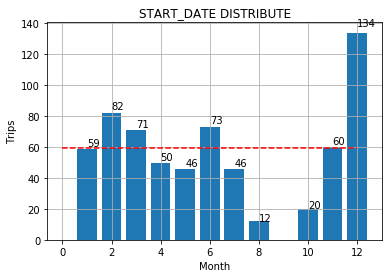

In [43]:
sd_m_dis=df1["START_DATE*"].dt.month.value_counts()
sd_m_dis=sd_m_dis.sort_index()
sd_m_mean=sd_m_dis.mean()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
figure(0)
rects=plt.bar(sd_m_dis.index,sd_m_dis.values)
plt.plot([0,len(sd_m_dis.index)+1],[sd_m_mean,sd_m_mean],"r--")
plt.title("START_DATE DISTRIBUTE")
plt.xlabel("Month")
plt.ylabel("Trips")
plt.grid()
autolabel(rects)

Driver took more number of rides in the  month of december.Interestingly,there is no ride recorded in september. In April,May,August and october trips are less than the average value.

**Explore start date by hour**

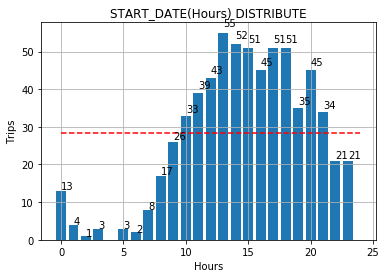

In [45]:
sd_h_dis=df1["START_DATE*"].dt.hour.value_counts()
sd_h_dis=sd_h_dis.sort_index()
sd_h_mean=sd_h_dis.mean()
figure(1)
rects=plt.bar(sd_h_dis.index,sd_h_dis.values)
plt.plot([0,len(sd_h_dis.index)+1],[sd_h_mean,sd_h_mean],"r--")
plt.title("START_DATE(Hours) DISTRIBUTE")
plt.xlabel("Hours")
plt.ylabel("Trips")
plt.grid()
autolabel(rects)

Most of the orders are between 10am and 6pm

**2.End Date**

End date will be similar to start date so we are skipping it :)

**3.Category**

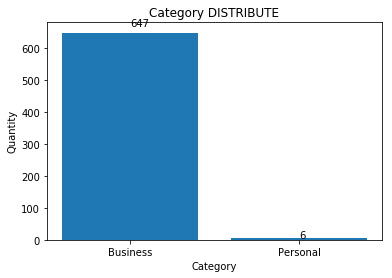

In [54]:
ct_dis=df1["CATEGORY*"].value_counts()
figure(2)
rects=plt.bar(range(1,len(ct_dis.index)+1),ct_dis.values)
plt.title("Category DISTRIBUTE")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ct_dis.index)+1),ct_dis.index)
#plt.grid()
autolabel(rects)

We can see most of trips are business trip. So driver spending most of the time for business work rather than personal work.

**4.Start**

In [56]:
st_dis=df1["START*"].value_counts()
st_dis.sort_values(inplace=True,ascending=False)
st_dis=st_dis.iloc[:10]
print("Start place:\n",st_dis)

Start place:
 Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Name: START*, dtype: int64


Most of the trips are started at CARY

**5.Stop**

In [58]:
stp_dis=df["STOP*"].value_counts()
stp_dis.sort_values(ascending=False)
stp_dis=stp_dis.iloc[:10]
print("STOP_PLACE:\n",stp_dis)

STOP_PLACE:
 Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP*, dtype: int64


We can conclude drivers place is CARY

In [65]:
ml_dis=df1["MILES*"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)
print("Miles:\n",ml_dis)

Miles:
 <=5      248
5-10     220
10-15     96
>20       47
15-20     42
dtype: int64


Driving is picking more shorter distance trips than a longer one. I think he can get more money on shorter trips.

**6.Purpose**

In [66]:
pp_dis=df["PURPOSE*"].value_counts()
pp_dis.sort_values(ascending=False)
pp_dis=pp_dis.iloc[:10]
print("PURPOSE:\n",pp_dis)

PURPOSE:
 Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64


Meeting and Meal/Entertain purpose has more trips. Surprisingly,Between Offices and airport travel has very less trips.

**Creating new columns**

In [71]:
df1['triptype']=np.where(df1['MILES*']<=df1['MILES*'].mean(),'short','long')

In [73]:
trip_type=df1['triptype'].value_counts()
trip_type.sort_values(ascending=False)
trip_type=trip_type.iloc[:10]
print("PURPOSE:\n",trip_type)

PURPOSE:
 short    506
long     147
Name: triptype, dtype: int64


We have alresdy identified that there is more number of short trips. Creation of new column can be used for further analysis.

In [74]:
df1['KMS']=df1['MILES*'].apply(lambda Y :Y*1.6)

In [75]:
df1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,triptype,KMS
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,short,8.16
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,short,7.68
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,short,7.52
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,long,101.92
5,2016-01-06 17:15:00,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,short,6.88


Created KM column based on miles.

In [79]:
df1["END_DATE*"]=pd.to_datetime(df1["END_DATE*"],format="%m/%d/%Y %H:%M") #changing the datatype and format of END date
#Calculate the duration for the rides
df1['Duration'] = df1['END_DATE*'] - df1['START_DATE*']
#convert duration to numbers(minutes)
df1.loc[:, 'Duration'] = df1['Duration'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)
df1['SpeedMph']=df1['MILES*']/df1['Duration'] #creating speed column

We have created speed column from miles and duration columns. This can be used for further analysis.

**Findings**

Based on above analysis we can answer many questions on the dataset. Few are shown below.

**What is the average length of the trip?**

In [100]:
print('Average length of trip in minutes:\n',df1['Duration'].mean())

Average length of trip in minutes:
 23.398162327718225


**Whats is average number of rides per month?**

In [101]:
print('Trips per month', sd_m_dis)

Trips per month 1      59
2      82
3      71
4      50
5      46
6      73
7      46
8      12
10     20
11     60
12    134
Name: START_DATE*, dtype: int64


**Whats is average number of rides per hour?**

In [103]:
print('Trips per hour',sd_h_dis)

Trips per hour 0     13
1      4
2      1
3      3
5      3
6      2
7      8
8     17
9     26
10    33
11    39
12    43
13    55
14    52
15    51
16    45
17    51
18    51
19    35
20    45
21    34
22    21
23    21
Name: START_DATE*, dtype: int64


**Category vs Purpose Vs Miles**

In [90]:
df1.groupby(['CATEGORY*','PURPOSE*'])['MILES*'].agg(['mean','count','max','min'])

mean  count    max    min
CATEGORY* PURPOSE*                                        
Business  Airport/Travel     5.500000      3    7.6    4.1
          Between Offices   10.944444     18   39.2    1.9
          Customer Visit    20.688119    101  310.3    0.8
          Errand/Supplies    3.968750    128   22.3    0.5
          Meal/Entertain     5.698125    160   36.5    0.6
          Meeting           15.247594    187  201.0    0.7
          Temporary Site    10.474000     50   48.2    1.8
Personal  Charity ($)       15.100000      1   15.1   15.1
          Commute          180.200000      1  180.2  180.2
          Moving             4.550000      4    6.1    3.3

We can see most of the trips are used for business/Meetings trips.

**Category vs Triptype vs Purpose Vs Speed**

In [105]:
df1.groupby(['CATEGORY*','triptype','PURPOSE*'])['SpeedMph'].agg(['mean','median','max','min','count'])

mean     median         max  \
CATEGORY* triptype PURPOSE*                                            
Business  long     Between Offices  27.364412  25.278325   45.555556   
                   Customer Visit   41.010233  37.607143  103.578947   
                   Errand/Supplies  27.889604  23.473684   45.789474   
                   Meal/Entertain   33.718540  30.750000   71.000000   
                   Meeting          33.582243  28.363636   91.500000   
                   Temporary Site   38.824811  27.600000  176.250000   
          short    Airport/Travel   13.531575  15.724138   16.400000   
                   Between Offices  23.446043  24.705882   31.000000   
                   Customer Visit   24.099109  19.937500  228.000000   
                   Errand/Supplies  19.121037  18.000000   67.500000   
                   Meal/Entertain   20.702340  18.750000   64.500000   
                   Meeting          25.462691  25.500000   85.200000   
                   Temporary Site   24.170303  22.800000  118.800000   
Personal  long     Charity ($)      33.555556  33.555556   33.555556   
                   Commute          58.443243  58.443243   58.443243   
          short    Moving           18.388393  17.812500   20.500000   

                                          min  count  
CATEGORY* triptype PURPOSE*                           
Business  long     Between Offices  13.358491     10  
                   Customer Visit   14.653846     37  
                   Errand/Supplies  21.346154      5  
                   Meal/Entertain   17.833333     13  
                   Meeting           7.727273     71  
                   Temporary Site   18.142857     17  
          short    Airport/Travel    8.470588      3  
                   Between Offices  12.631579      8  
                   Customer Visit    9.600000     64  
                   Errand/Supplies   6.000000    123  
                   Meal/Entertain    6.000000    147  
                   Meeting           6.000000    116  
                   Temporary Site    7.950000     33  
Personal  long     Charity ($)      33.555556      1  
                   Commute          58.443243      1  
          short    Moving           17.428571      4